# Machine Learning Computer Homework 3
## Handwritten image classification
## Part 2: Neural Network
Neural networks make basis for very complex AI models, which we use nowadays, like speech recognizers on smartphones or Google’s latest automatic translator.\
Deep learning is in fact a new name for an approach to artificial intelligence called neural networks, which have been going in and out of fashion for more than 70 years. Neural networks were first proposed in 1944 by Warren McCullough and Walter Pitts, two University of Chicago researchers who moved to MIT in 1952 as founding members of what’s sometimes called the first cognitive science department. \
In this part, we want to design a neural network to classify handwritten images (same job as SVM in part1)


## Using simple dataset from sklearn (40 pts)
### Q1. Split train and test (5)
Split 20 percent of data as test set, and 80 percent for train set. \
Why we don't use whole dataset as training set? \
answer: If you use all of your data for training, then you will have no way of telling about the performance of your system, since you will not have any data to test its performance. So it will be like you have a system but you have no idea about how well it performs.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

#Loading digits dataset from sklearn preloaded datasets
digits = datasets.load_digits()

#TODO
train_data, test_data, train_labels, test_labels= train_test_split(digits.data,digits.target,train_size=0.8, test_size=0.2, random_state=1)
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


### Q2 . Design Neural network (30)
try to design a neural network with not more than 2 hidden layers. you should reach higher accurecies with simpler networks. \
Try different learning rates, activation functions, hidden layers and other parameters to reach at least 90% accuracy (you will calculate accuracy in the next part). \
layers:
- an input layer, with 64 nodes, one node per pixel in the input images. Nodes are neurons that actually do nothing. They -  just take their input value and send it to the neurons of the next layer
-hidden layers: you have to design these.
-an output layer with 10 neurons corresponding to our 10 classes of digits, from 0 to 9.

In [ ]:
from sklearn.neural_network import MLPClassifier
#TODO
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', alpha=1e-4,solver='sgd',tol=1e-4,random_state=1,learning_rate_init=.3,verbose=True)

fit the designed dataset:

In [ ]:
#TODO
mlp.fit(train_data, train_labels)

Iteration 1, loss = 2.25145782
Iteration 2, loss = 1.97730357
Iteration 3, loss = 1.66620880
Iteration 4, loss = 1.41353830
Iteration 5, loss = 1.29575643
Iteration 6, loss = 1.06663583
Iteration 7, loss = 0.95477274
Iteration 8, loss = 0.98147910
Iteration 9, loss = 0.83382627
Iteration 10, loss = 0.81587889
Iteration 11, loss = 0.81809556
Iteration 12, loss = 0.75472991
Iteration 13, loss = 0.79803968
Iteration 14, loss = 0.93713090
Iteration 15, loss = 0.87958887
Iteration 16, loss = 0.69297509
Iteration 17, loss = 0.73474511
Iteration 18, loss = 0.71357231
Iteration 19, loss = 0.66587115
Iteration 20, loss = 0.68127777
Iteration 21, loss = 0.77130936
Iteration 22, loss = 0.60847696
Iteration 23, loss = 0.61047341
Iteration 24, loss = 0.60556397
Iteration 25, loss = 0.63795904
Iteration 26, loss = 0.99622678
Iteration 27, loss = 0.79401372
Iteration 28, loss = 0.86242438
Iteration 29, loss = 0.83266625
Iteration 30, loss = 0.63303024
Iteration 31, loss = 0.61381898
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),
              learning_rate_init=0.3, random_state=1, solver='sgd',
              verbose=True)

### Q3. Model statistics (5)
Here we want to see how good our model is! for this, we try to calculate accuracy, precision, recall and ... \
First try to predict results of the test set, and calculate the accuracy using the predicted labels with given groundtruth labels:

In [ ]:
# Use metrics.classification_report() method to get an overview of model's performance
#TODO
from sklearn.metrics import accuracy_score

predictions = mlp.predict(test_data)
accuracy_score(test_labels, predictions)

0.8222222222222222

To see more details of the result, plot confusion matrix:

Confusion matrix:
[[41  0  0  0  2  0  0  0  0  0]
 [ 0 22  2  0  1  0  4  3  3  0]
 [ 2  0 29  2  0  0  0  0  3  0]
 [ 0  2  0 33  0  0  0  0  0  6]
 [ 0  3  0  0 34  1  0  0  0  0]
 [ 0  0  0  0  2 25  0  1  0  2]
 [ 0  4  0  0  0  1 32  0  0  0]
 [ 0  1  0  0  1  0  0 34  0  1]
 [ 2  1  0  0  1  0  0  1 23  1]
 [ 2  0  0  0  0  1  0  8  0 23]]


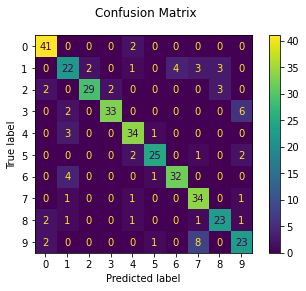

In [ ]:
#TODO
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_labels,predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

# Using more complex dataset (60)
MNIST is a dataset of handwritten digits, from 0 to 9, created by LeCun. this dataset consists of 60000 train images and 10000 test images with 28*28 resolution. \
run the cell below to download the dataset.

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)

(70000, 784)


## Q1. Split train and test (5)
Split the train and test sets; remember we have 70000 images, in which 60000 of them are for training and 10000 of them are testset.
Why we don't use whole dataset as training set?

In [ ]:
#TODO
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X.astype(np.float32),y.astype(np.float32),test_size=(1 / 7.))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 784)
(10000, 784)
(60000,)
(10000,)


## Q2. Design The Neural network (35)
Split the train and test sets; remember we have 70000 images, in which 60000 of them are for training and 10000 of them are testset.
try to design a neural network with not more than 2 hidden layers. you should reach higher accurecies with simpler networks. 

In [ ]:
#TODO
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', alpha=1e-4,solver='sgd',tol=1e-4,random_state=1,learning_rate_init=.3,verbose=True)
mlp.fit(x_train,y_train)


Iteration 1, loss = 0.74003015
Iteration 2, loss = 0.46458184
Iteration 3, loss = 0.43763818
Iteration 4, loss = 0.42321097
Iteration 5, loss = 0.41414414
Iteration 6, loss = 0.40445413
Iteration 7, loss = 0.39416950
Iteration 8, loss = 0.38736306
Iteration 9, loss = 0.38185781
Iteration 10, loss = 0.37781018
Iteration 11, loss = 0.37417705
Iteration 12, loss = 0.37083408
Iteration 13, loss = 0.36746725
Iteration 14, loss = 0.36536694
Iteration 15, loss = 0.36448416
Iteration 16, loss = 0.36192233
Iteration 17, loss = 0.36223040
Iteration 18, loss = 0.36097071
Iteration 19, loss = 0.35761329
Iteration 20, loss = 0.35694758
Iteration 21, loss = 0.35673777
Iteration 22, loss = 0.35760204
Iteration 23, loss = 0.35511108
Iteration 24, loss = 0.35558085
Iteration 25, loss = 0.35504601
Iteration 26, loss = 0.35440747
Iteration 27, loss = 0.35336084
Iteration 28, loss = 0.35321462
Iteration 29, loss = 0.35251799
Iteration 30, loss = 0.35103567
Iteration 31, loss = 0.35247861
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),
              learning_rate_init=0.3, random_state=1, solver='sgd',
              verbose=True)

#### Note: Answer this part if your loss is abnormal:
Why do you think loss is abnormal and what solution do you suggest? \
Print pixel values of an image from dataset; what is the max and min of these values? Try normalizing the data (pixel values) by mapping them to [0,1] range.


In [ ]:
#TODO
import numpy as np
# rescale image values
X = X.astype(np.float32)
X /= 255.
X -= X.mean(axis=0)

## Q3. Accuracy (5)
Print train and test accuracy. According to these results, how can we conclude the model has overfitted or not?

In [ ]:
from sklearn.metrics import accuracy_score

predictions_train = mlp.predict(x_train)
predictions_test = mlp.predict(x_test)
train_score = accuracy_score(predictions_train, y_train)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, y_test)
print("score on test data: ", test_score)

score on train data:  0.91215
score on test data:  0.8954


Plot the confusion matrix:

Confusion matrix:
[[ 922    0    8    1    2   24   14    0    5    2]
 [   1 1094   10    4    2    4    2    5   23    1]
 [  15    6  886   12   11    3   15    7   28    5]
 [   2    9   38  880    1   50    2   23   17    6]
 [   5    2    4    0  870    2   10    3    8   56]
 [  13    4   12   48   16  747   10    4   48    9]
 [   6    1    8    0   13    9  925    0   21    1]
 [   3    9   14   12   14    1    1  944    0   45]
 [   6   23   12   33    4   40   14    0  821   18]
 [   5    0    0    6   43    9    1   52   10  865]]


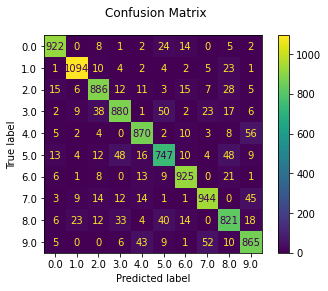

In [ ]:
#TODO
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

### Q4. Plotting the MLP coefficeints (15pts)
Here, we try to plot coefficients of the neural network.

weights between input and first hidden layer:
[[-0.00785066  0.02084006 -0.04728942 -0.01869813 -0.03340477]
 [-0.0385602  -0.0296688  -0.01460573 -0.00976486  0.00367136]
 [-0.00763885  0.01752039 -0.02794984  0.03576239 -0.04470728]
 ...
 [ 0.02520105 -0.02912773  0.00866789  0.01010592 -0.00550062]
 [ 0.03448742  0.00411264 -0.00068765 -0.00774234 -0.04140681]
 [-0.01304122 -0.03851506  0.00620947  0.01328866  0.02532775]]

weights between first hidden and second hidden layer:
[[-6.3137302   5.8821573  -4.170707    3.7106457  -1.093905    2.2345238
  -5.24682     1.5000618   2.7777028   1.1143647 ]
 [-2.9742632   4.831736   -0.26079655 -1.2018726   3.3055174   0.6031988
   6.1068316  -3.9728973  -1.9502611  -4.752033  ]
 [ 4.2469854  -4.138086   -0.9920945   2.6093385  -0.5179151   2.6815732
  -1.7772323   4.6562996  -5.186009   -1.5511297 ]
 [ 4.6715736  -6.1977267  -3.7688825  -5.0247273   3.2590954   2.0578432
   5.492687   -4.665153    1.4685339   2.245344  ]
 [-1.4080521  -2.08

Text(0.5, 1.0, 'weights between first hidden and second hidden layer')

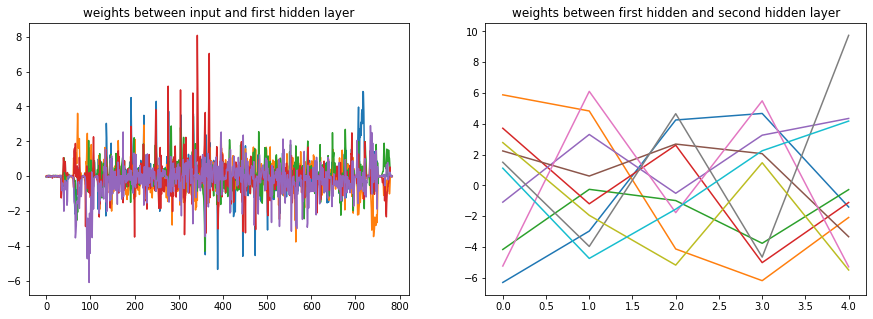

In [ ]:
#TODO
print("weights between input and first hidden layer:")
print(mlp.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(mlp.coefs_[1])

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2)
fig.set_size_inches(15,5)

axs[0].plot(mlp.coefs_[0])
axs[0].set_title('weights between input and first hidden layer')
axs[1].plot(mlp.coefs_[1])
axs[1].set_title('weights between first hidden and second hidden layer')


# Optional: Deep neural networks! (optional: 20)
In recent years, deep neural networks has attracted so much attention because of their great results and ease of development.  Deep learning is a class of machine learning algorithms that uses multiple layers to progressively extract higher-level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces. \
There are two important libraries which we use to develop neural network: 1.Tensorflow  2.Pytorch \
Here we want to use keras (an interface for tensorflow) because of its simlpicity.

In this part, we don't want to guide you and tell the steps of designing a neural network, because you've learned it already in the previous parts! we just explain the problem: 
Develop a MLP to classify Fashion Cifar10 with more than 80 percent accuracy!


In [ ]:
#TODO
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


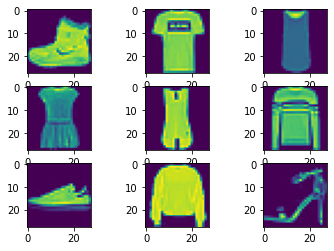

In [ ]:
import matplotlib.pyplot as plt

for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i])
# show the figure
plt.show()

In [ ]:

from keras.utils import to_categorical
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(trainY)
print(trainY.shape)
testY = to_categorical(testY)
print(testY.shape)

(60000, 10)
(10000, 10)


In [ ]:
trainX= trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=trainX[0].shape))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, verbose=0)


Train: 0.992, Test: 0.910


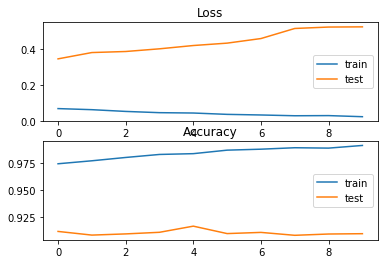

In [61]:
# evaluate the modeZ
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()